In [1]:
from setting import *

%matplotlib inline

In [2]:
tickers = ['KS11']
names = ['kospi']

In [3]:
data = getHistoryByFdr(tickers, names)
print('data \n', data)

assets = data.resample('M').last()
assets['CASH'] = pow(1.03, 1/12)
assets['CASH'] = assets['CASH'].shift(1, fill_value=1.0)
assets['CASH'] = assets['CASH'].cumprod()
print('assets \n', assets)

data 
                   kospi
Date                   
1996-12-11   704.679993
1996-12-12   689.380005
1996-12-13   689.070007
1996-12-16   673.919983
1996-12-17   663.349976
...                 ...
2022-11-24  2441.330078
2022-11-25  2437.860107
2022-11-28  2408.270020
2022-11-29  2433.389893
2022-12-01  2486.570068

[6401 rows x 1 columns]
assets 
                   kospi      CASH
Date                             
1996-12-31   651.219971  1.000000
1997-01-31   685.840027  1.002466
1997-02-28   676.530029  1.004939
1997-03-31   677.340027  1.007417
1997-04-30   703.229980  1.009902
...                 ...       ...
2022-08-31  2472.050049  2.135447
2022-09-30  2155.489990  2.140713
2022-10-31  2293.610107  2.145993
2022-11-30  2433.389893  2.151286
2022-12-31  2486.570068  2.156591

[313 rows x 2 columns]


In [4]:
weights = {}
momentum = {}
for i in range(0,12):
    #globals()['weights_{}'.format(str(i))] = getWeightByAbsoluteMomentum(assets, i+1)
    #momentum[i] = Target_Weight_BT(assets, globals()['weights_{}'.format(str(i))], 'momentum_{}'.format(str(i+1)))
    weights[i] = getWeightByAbsoluteMomentum(assets, i+1)
    momentum[i] = Target_Weight_BT(assets, weights[i], 'momentum_{}'.format(str(i+1)))


momentum 
                kospi      CASH
Date                          
1996-12-31       NaN       NaN
1997-01-31  0.053162  0.002466
1997-02-28 -0.013575  0.002466
1997-03-31  0.001197  0.002466
1997-04-30  0.038223  0.002466
...              ...       ...
2022-08-31  0.008383  0.002466
2022-09-30 -0.128056  0.002466
2022-10-31  0.064078  0.002466
2022-11-30  0.060943  0.002466
2022-12-31  0.021854  0.002466

[313 rows x 2 columns]
momentum 
                kospi      CASH
Date                          
1996-12-31       NaN       NaN
1997-01-31       NaN       NaN
1997-02-28  0.038866  0.004939
1997-03-31 -0.012394  0.004939
1997-04-30  0.039466  0.004939
...              ...       ...
2022-08-31  0.059765  0.004939
2022-09-30 -0.120746  0.004939
2022-10-31 -0.072183  0.004939
2022-11-30  0.128927  0.004939
2022-12-31  0.084129  0.004939

[313 rows x 2 columns]
momentum 
                kospi      CASH
Date                          
1996-12-31       NaN       NaN
1997-01-31       NaN

In [5]:
index = Buy_n_Hold_BT(assets[names[0]].to_frame(), names[0])
report = bt.run(index, *momentum.values())

kospi:1996-12-31 00:00:00. Value:100000000, Price:100.0000
1996-12-31 00:00:00
{'selected': ['kospi'], 'weights': {'kospi': 1.0}}


Stat                 kospi       momentum_1    momentum_2    momentum_3    momentum_4    momentum_5    momentum_6    momentum_7    momentum_8    momentum_9    momentum_10    momentum_11    momentum_12
-------------------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------  -------------  -------------
Start                1996-12-30  1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30     1996-12-30     1996-12-30
End                  2022-12-31  2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31     2022-12-31     2022-12-31
Risk-free rate       0.00%       0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%          0.00%          0.00%



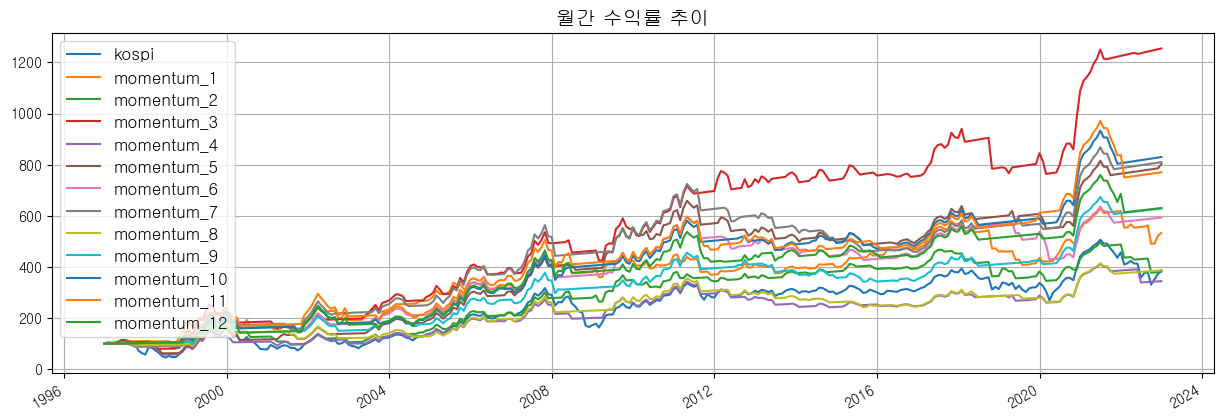

In [6]:
report.plot()
plt.title('월간 수익률 추이')

print(report.display())
print(report.display_monthly_returns())

<AxesSubplot:>

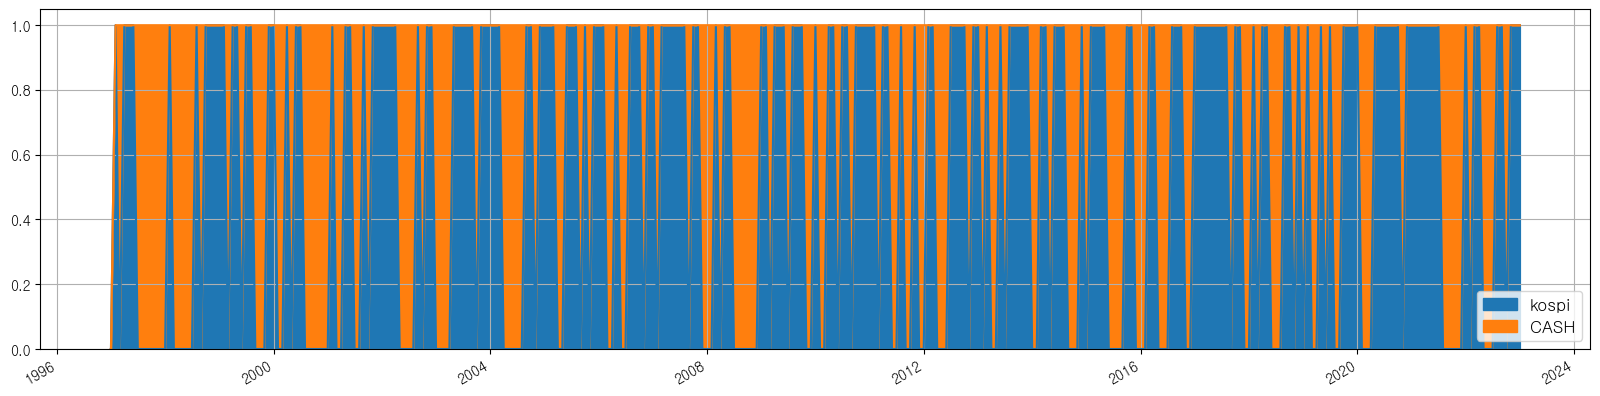

In [9]:
report.backtests['momentum_1'].security_weights.plot.area()